In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

In [3]:
img = cv2.imread('sample.jpg', 0)  

(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

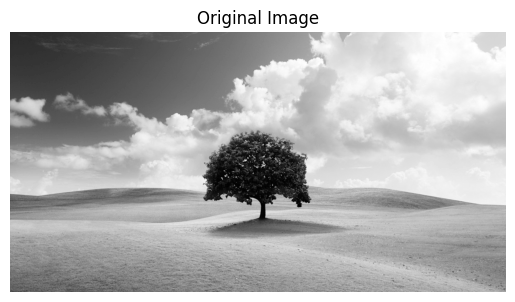

In [5]:
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

Text(0, 0.5, 'Frequency')

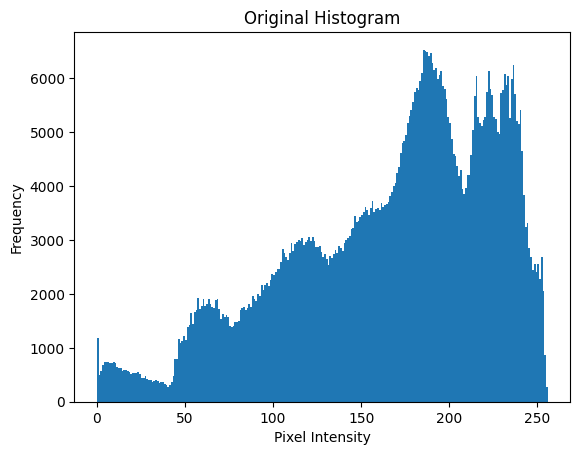

In [7]:
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

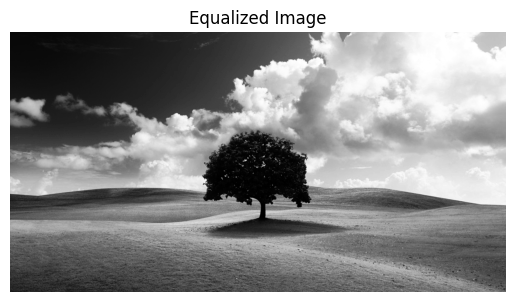

In [9]:
equalized = cv2.equalizeHist(img)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

Text(0, 0.5, 'Frequency')

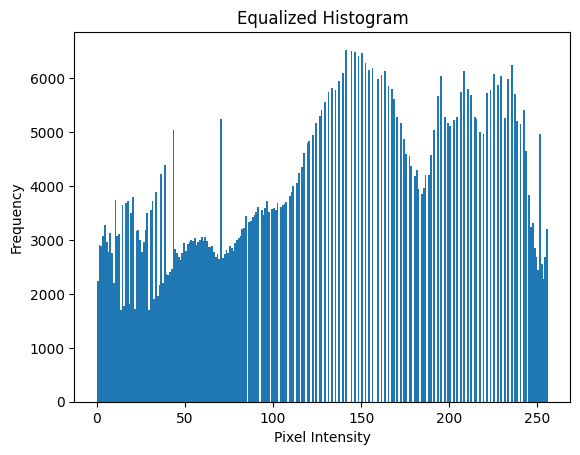

In [11]:
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [17]:
display(img)

array([[ 42,  43,  43, ..., 214, 215, 215],
       [ 42,  43,  43, ..., 215, 215, 215],
       [ 42,  43,  43, ..., 215, 215, 215],
       ...,
       [ 93,  96,  95, ..., 155, 152, 156],
       [ 93,  89,  87, ..., 167, 159, 164],
       [ 89,  81,  69, ..., 171, 163, 162]], dtype=uint8)

In [19]:
display(equalized)

array([[  7,   7,   7, ..., 193, 195, 195],
       [  7,   7,   7, ..., 195, 195, 195],
       [  7,   7,   7, ..., 195, 195, 195],
       ...,
       [ 35,  37,  36, ...,  95,  91,  96],
       [ 35,  32,  31, ..., 110, 100, 106],
       [ 32,  27,  21, ..., 116, 105, 104]], dtype=uint8)

(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

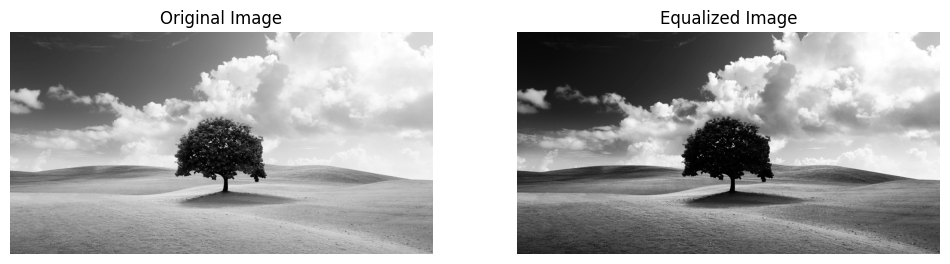

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
equalized = cv2.equalizeHist(img)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

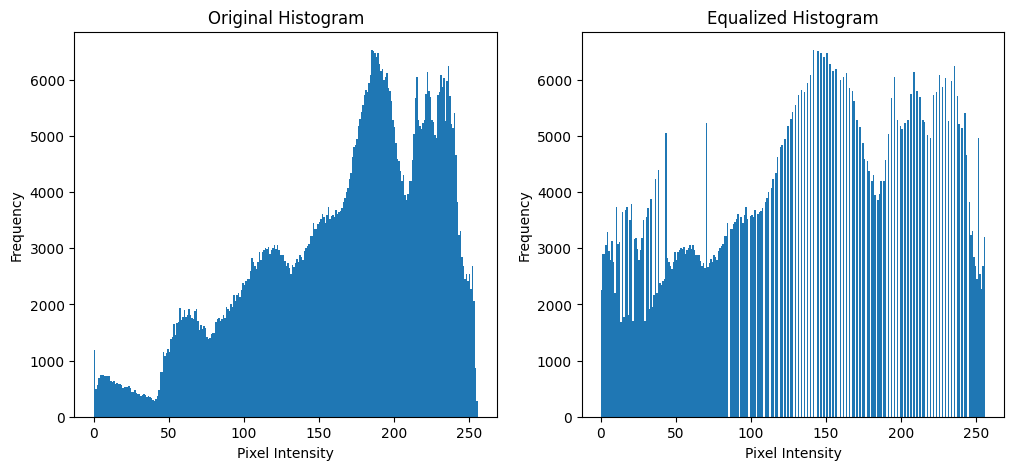

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

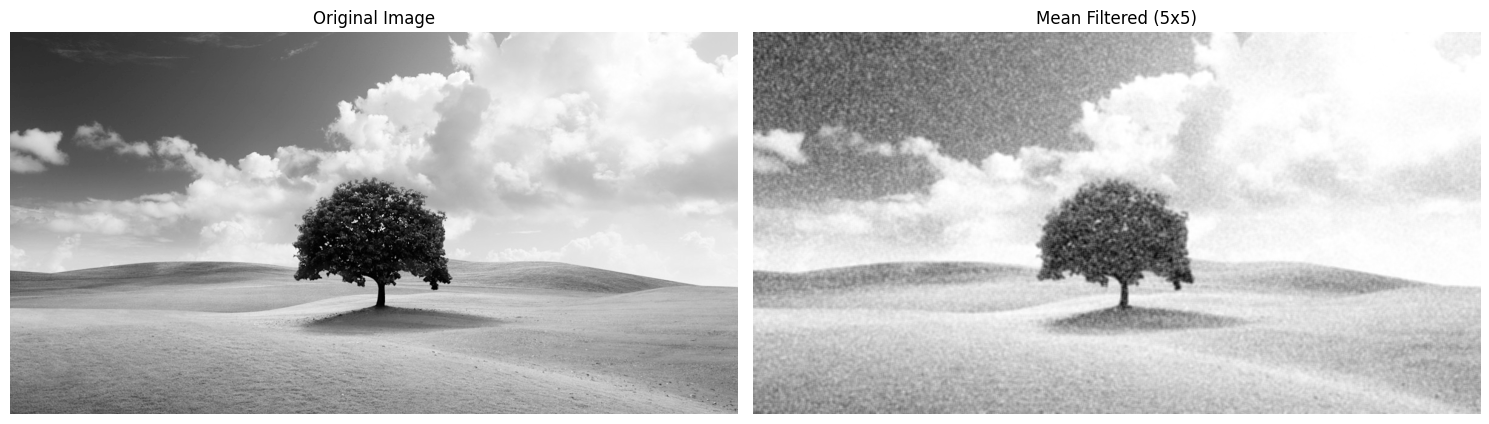

In [17]:

def mean_filter(image, kernel_size=3):

    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    
    filtered_image = cv2.filter2D(image, -1, kernel)
    
    return filtered_image


noisy_img = img.copy()
noise = np.random.normal(20, 25, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)


mean_filtered = mean_filter(noisy_img,5)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filtered (5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

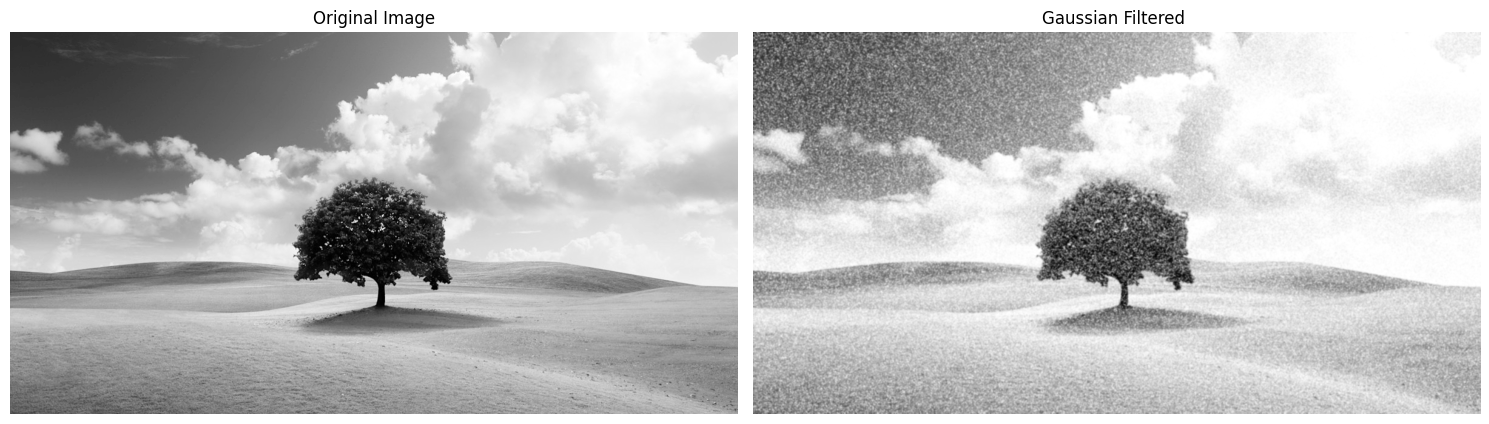

In [21]:
def gaussian_filter(image, kernel_size=5, sigma=1.0):

    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    return filtered_image


gaussian_filtered = gaussian_filter(noisy_img, 5, 1.0)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered ')
plt.axis('off')

plt.tight_layout()
plt.show()

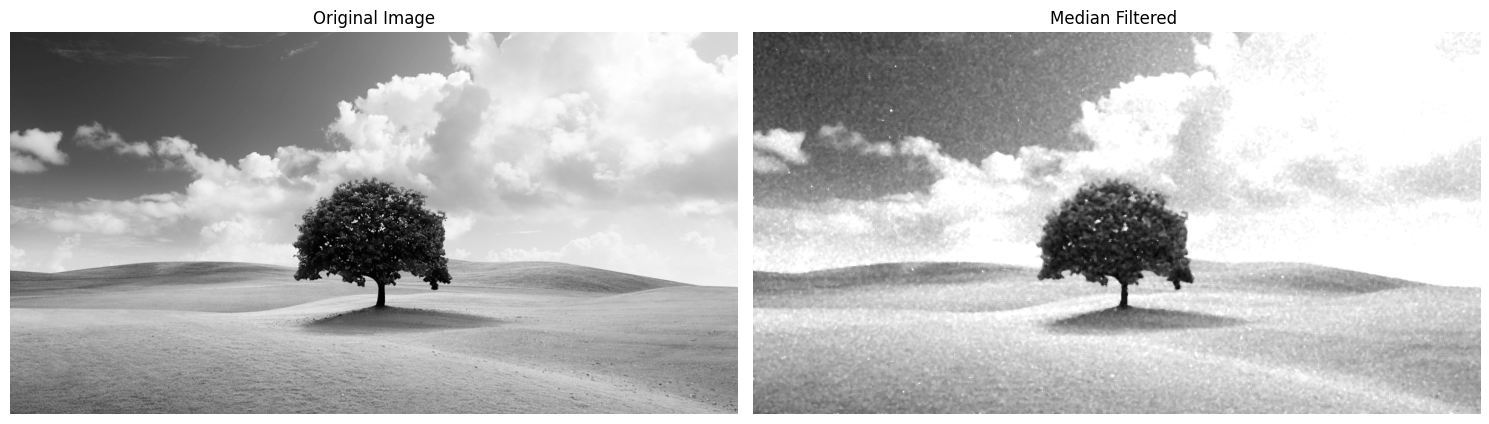

In [25]:

def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

median_filtered = median_filter(noisy_img, 5)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered ')
plt.axis('off')

plt.tight_layout()
plt.show()


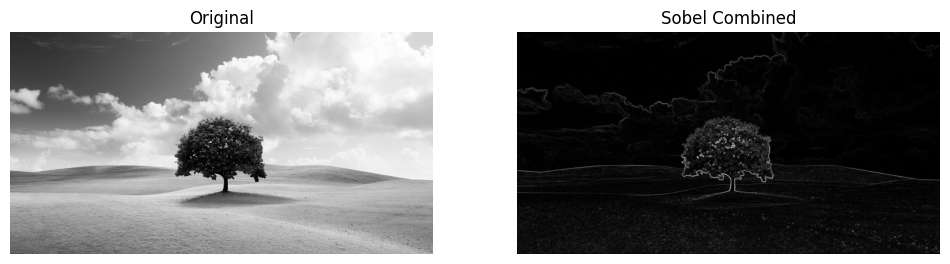

In [27]:

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) 
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  

sobel_combined = cv2.magnitude(sobelx, sobely)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.axis('off')
plt.show()


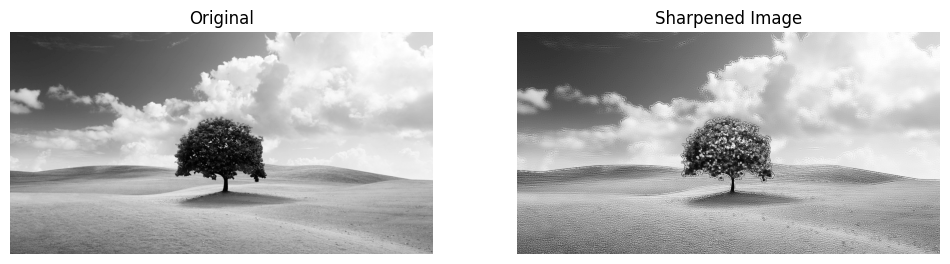

In [29]:

laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)


sharpened = cv2.convertScaleAbs(img + laplacian)


plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(sharpened, cmap='gray'), plt.title("Sharpened Image"), plt.axis("off")
plt.show()


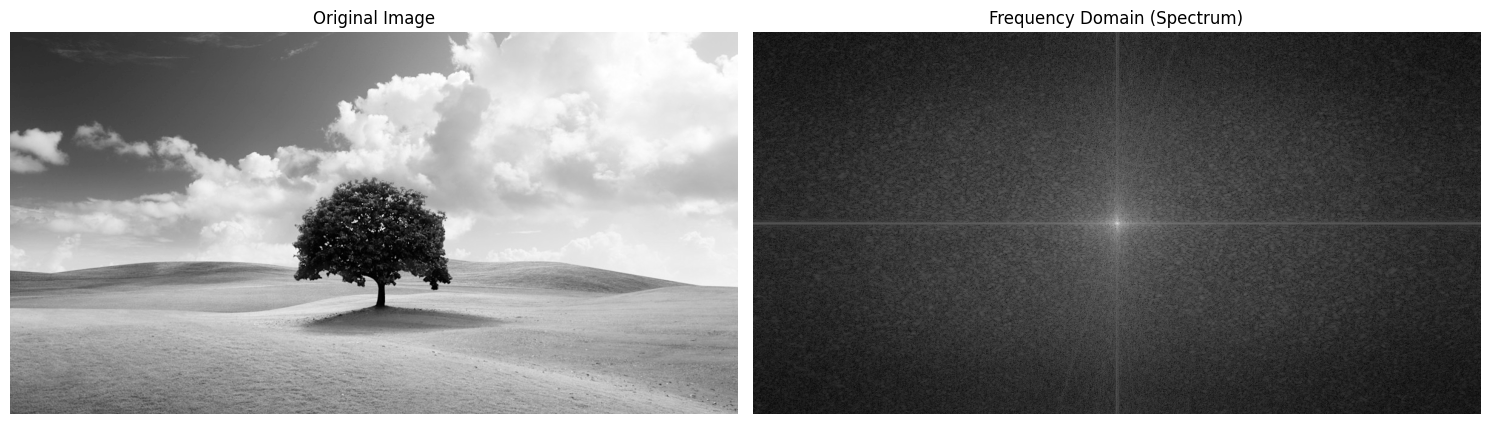

In [33]:
image = cv2.imread("sample.jpg",cv2.IMREAD_GRAYSCALE)

f_transform = fft2(np.float32(image) / 255.0)
f_shift = fftshift(f_transform)

magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency Domain (Spectrum)")
plt.axis("off")

plt.tight_layout()
plt.show()

In [35]:
def apply_filter(img, H):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    G = fshift * H
    g = np.fft.ifft2(np.fft.ifftshift(G))
    return np.abs(g)

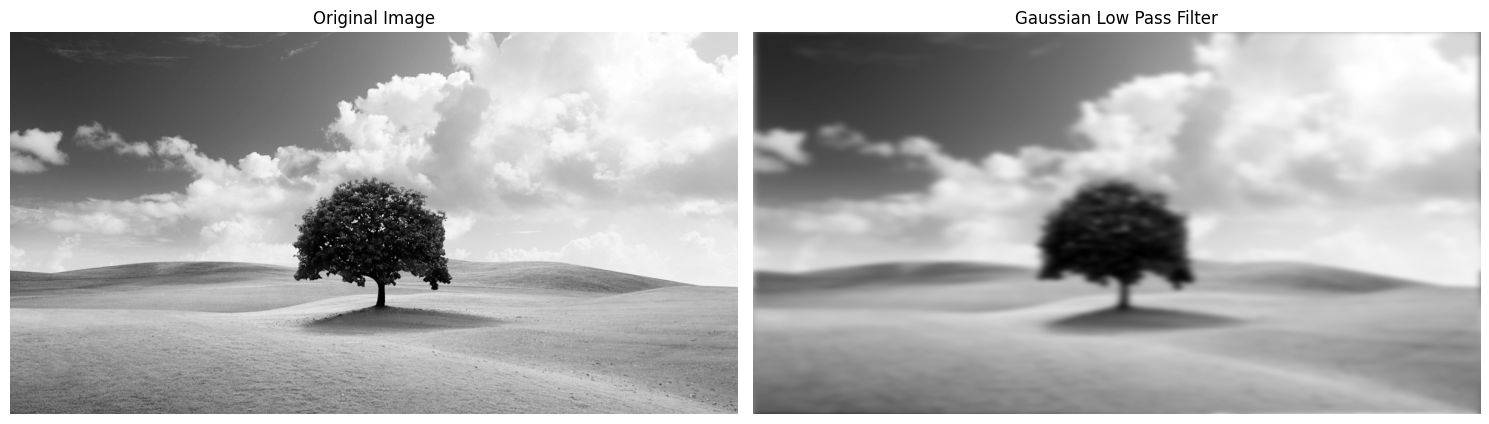

In [37]:
def gaussian_lpf(shape, cutoff):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D2 = U**2 + V**2
    H = np.exp(-D2 / (2*(cutoff**2)))
    return H

H = gaussian_lpf(img.shape, cutoff=30)
filtered = apply_filter(img, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Gaussian Low Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

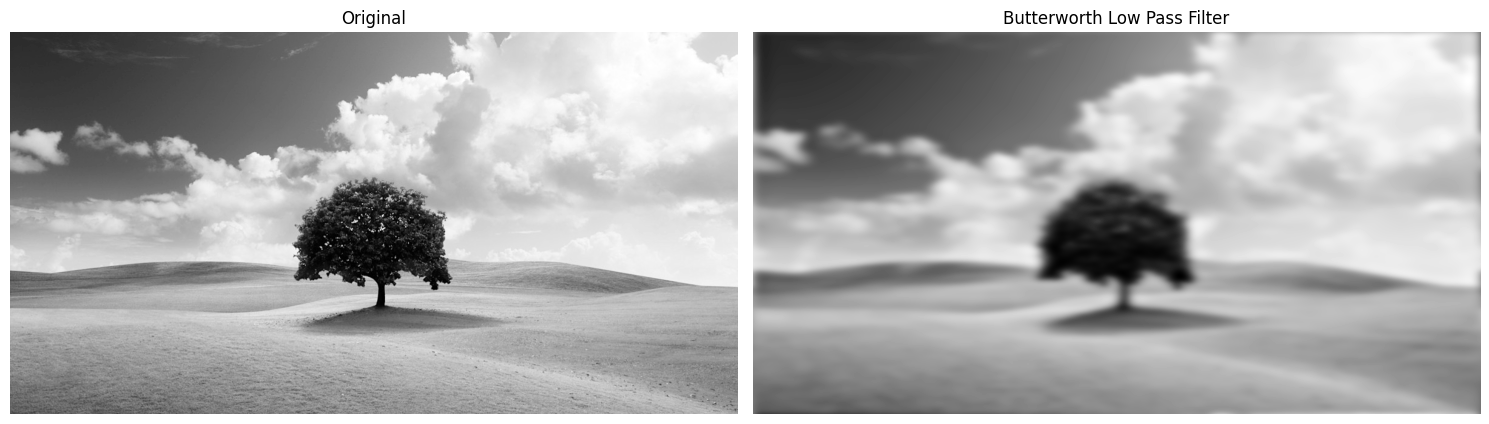

In [39]:
def butterworth_lpf(shape, cutoff, order=2):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff)**(2*order))
    return H

H = butterworth_lpf(image.shape, cutoff=30, order=2)
filtered = apply_filter(img, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Butterworth Low Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


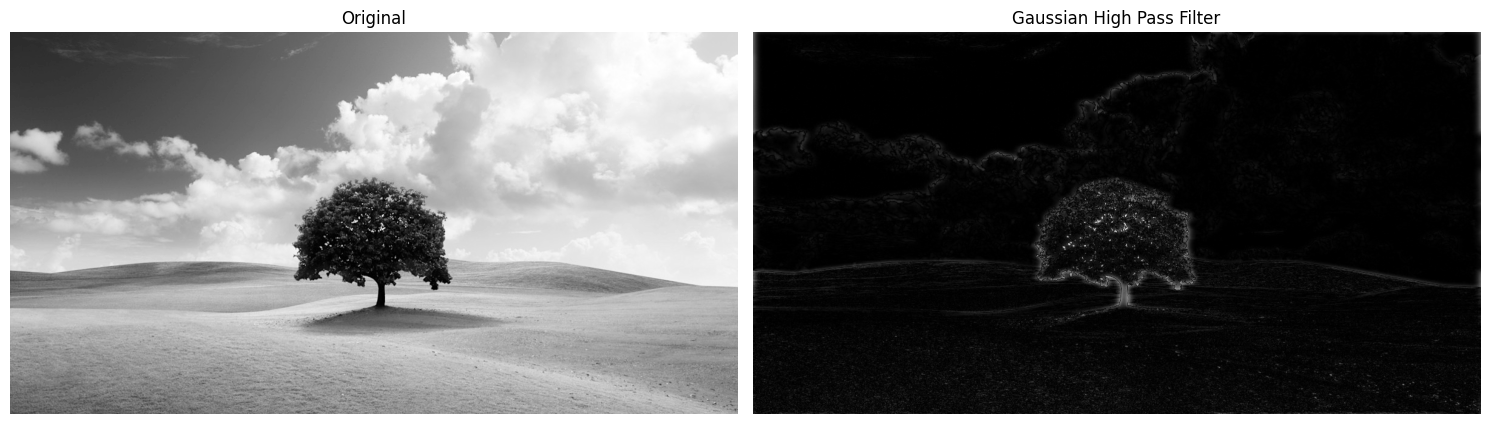

In [41]:
def gaussian_hpf(shape, cutoff):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D2 = U**2 + V**2
    H = 1 - np.exp(-D2 / (2*(cutoff**2)))
    return H

H = gaussian_hpf(img.shape, cutoff=30)
filtered = apply_filter(img, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Gaussian High Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

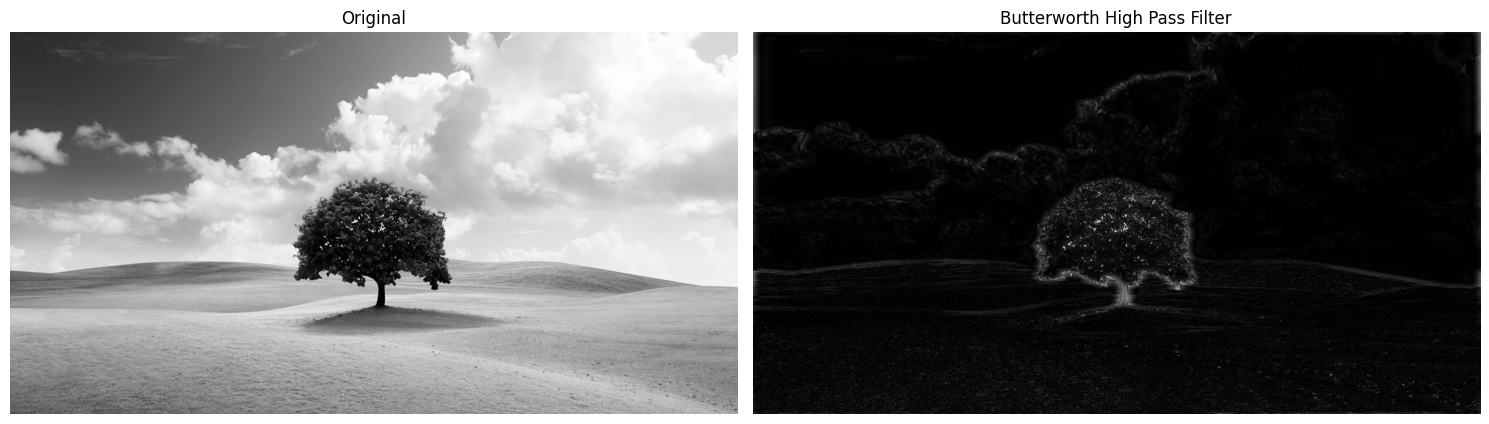

In [43]:
def butterworth_hpf(shape, cutoff, order=2):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 - (1 / (1 + (D / cutoff)**(2*order)))
    return H

H = butterworth_hpf(img.shape, cutoff=30, order=2)
filtered = apply_filter(img, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Butterworth High Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()